In [1]:
import os.path
import glob
import datetime
import pandas as pd

In [2]:
os.path.abspath(".")

'/Users/xzhao17/Documents/GitHub/xcj_hypothesis_test_cfd/source_code/Python'

In [3]:
class OutputText:
    breaker = "---------------------------\n"
    def __init__(self, filepath):
        self.filepath = filepath

    def clear(self, *objs):
        msg = "\t".join([str(obj) for obj in objs])
        with open(self.filepath, 'w', encoding="utf-8") as fout:
            fout.write(f"{msg}\n{self.breaker}")
        print(msg)
    
    def write(self, *objs):
        msg = "\t".join([str(obj) for obj in objs])
        with open(self.filepath, 'a', encoding="utf-8") as fout:
            fout.write(f"{msg}\n{self.breaker}")
        print(msg)
            

## W

In [4]:
MIN_TWEETS = 33
FREQUENCY = '1D'

In [5]:
otxt = OutputText(f"log_f{FREQUENCY}_mt{MIN_TWEETS}.txt")
otxt.clear(f"FREQUENCY = {FREQUENCY}, MIN_TWEETS = {MIN_TWEETS}")

def showdf(df, head = True, msg=None):
    if msg is not None:
        otxt.write(msg)
    if head:
        otxt.write(df.head().to_string())
    else:
        otxt.write(df.to_string())
    otxt.write("Shape:", df.shape)

FREQUENCY = 1D, MIN_TWEETS = 33


In [6]:
wdf_all = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("../../datar/randRLRT/*.csv*")])
wdf_all.dropna(subset=["Author","Date","Sentiment"], inplace=True)
wdf_all.drop_duplicates("Url", inplace=True)
# wdf.drop(columns=["Url"], inplace=True)
wdf_all["Title"] = wdf_all["Title"].apply(lambda x: x.lower() if type(x) is str else x)
showdf(wdf_all)
wdf_all

                 Date                                                                                            Title                                                                                                              Url Sentiment           Author
0 2023-05-13 22:59:57                                                 the new wc macadamia from starbucks is so fire 🤤                                                        http://twitter.com/kiimmsta_/statuses/1657521089503985664  negative        kiimmsta_
1 2023-05-13 22:59:52                  rt @sweetambitions_ i hate people who act like they don’t eat mcdonald’s. 🤣🤣🤣🤣🤣                                                          http://twitter.com/xannakr/statuses/1657521069836599297  negative          xannakr
2 2023-05-13 22:59:52  medfluencers wearing their scrubs to starbucks hoping someone will notice they're a med student  https://www.reddit.com/r/medicalschool/comments/13eu2uv/medfluencers_wearing_their_scrubs_to_starbucks/

,Date,Title,Url,Sentiment,Author
0,2023-05-13 22:59:57,the new wc macadamia from starbucks is so fire 🤤,http://twitter.com/kiimmsta_/statuses/16575210...,negative,kiimmsta_
1,2023-05-13 22:59:52,rt @sweetambitions_ i hate people who act like...,http://twitter.com/xannakr/statuses/1657521069...,negative,xannakr
2,2023-05-13 22:59:52,medfluencers wearing their scrubs to starbucks...,https://www.reddit.com/r/medicalschool/comment...,neutral,dingdongdinger1
3,2023-05-13 22:59:43,rt @saint nike zoom vomero 5 “mystic navy & wo...,http://twitter.com/CaptainJack32_/statuses/165...,neutral,CaptainJack32_
4,2023-05-13 22:59:40,brownlee and orchard win at inaugural xterra w...,https://www.trizone.com.au/brownlee-and-orchar...,neutral,Shawn Smith
...,...,...,...,...,...
23164,2023-05-13 23:01:12,rt @justfreshkicks nike air max 1 'ugly duckli...,http://twitter.com/Robinso78593252/statuses/16...,neutral,Robinso78593252
23165,2023-05-13 23:01:07,what size on kobe 8 protro?,https://www.reddit.com/r/BBallShoes/comments/1...,neutral,DLeeJ1214
23166,2023-05-13 23:01:03,rt @bso a very high % of those accounts and si...,http://twitter.com/KatonNapier/statuses/165752...,neutral,KatonNapier
23167,2023-05-13 23:01:01,@notmikeharlow the only strength i give a fuck...,http://twitter.com/Fremean/statuses/1657521359...,negative,Fremean


In [7]:
wdf_all.shape

(313394, 5)

In [8]:
wdf_all["Author"].nunique()

236884

In [9]:
wdf_all.drop(wdf_all[wdf_all["Title"].isna()].index, inplace=True)

In [10]:
otxt.write("Unique Authors:", wdf_all["Author"].nunique())

Unique Authors:	161654


In [11]:
wdf_all.groupby("Author").size().value_counts()

1      144541
2       11537
3        2781
4        1041
5         493
        ...  
122         1
94          1
135         1
57          1
150         1
Length: 104, dtype: int64

In [12]:
wdf_size=wdf_all.groupby("Author").size().reset_index(name='Count')
wdf_size

,Author,Count
0,"""D.""",1
1,"""End Time Events"" by Rev. P.C. Simmons",2
2,"""msn.com""",1
3,"""nbclosangeles.com""",1
4,"""yahoo.com""",1
...,...,...
161649,💖Kimberly💖,1
161650,🔪Libre Anxiety K.O.D 🔪 T9🎤,1
161651,🕊️ VISION #YE24,1
161652,🧪🅱🅴🅰🅺🅴🆁🧪,2


In [13]:
wdf_size[wdf_size['Count']==1].nunique()

Author    144541
Count          1
dtype: int64

In [14]:
wdf_size[wdf_size['Count']==1].nunique()/wdf_all["Author"].nunique()

Author    0.894138
Count     0.000006
dtype: float64

In [15]:
wdf_size[wdf_size['Count']<=10].nunique()

Author    161172
Count         10
dtype: int64

In [16]:
wdf_size[wdf_size['Count']<=10].nunique()/wdf_all["Author"].nunique()

Author    0.997018
Count     0.000062
dtype: float64

In [17]:
"""
This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program. If not, see <https://www.gnu.org/licenses/>.

Equivalent R code found at: 
                    https://github.com/ahasverus/elbow
                    R code author : Nicolas Casajus (2020)

This python version authored by: Chathura Jayalath (2023)
"""


from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def get_elbow(in_xvals, in_yvals, in_plot=False, in_image_path="./elbow.png"):
    tdf = pd.DataFrame({"x": in_xvals, "y": in_yvals})
    model = LinearRegression().fit(tdf["x"].values.reshape((-1, 1)), tdf["y"].values)
    tdf["constant"] = model.intercept_ + model.coef_ * tdf["x"]
    pos = tdf.shape[0] // 2 - 1
    if tdf.loc[pos, "constant"] < tdf.loc[pos][1]:
        print("min")
        ymin = min(tdf.iloc[:, 1])
        tdf["benefits"] = ymin + (tdf.iloc[:, 1] - tdf["constant"])
        maxi = tdf.loc[tdf["benefits"].idxmax()]
    else:
        print("max")
        ymax = max(tdf.iloc[:, 1])
        tdf["benefits"] = ymax - (tdf["constant"] - tdf.iloc[:, 1])
        maxi = tdf.loc[tdf["benefits"].idxmin()]
    if in_plot:
        fig1, ax1 = plt.subplots()
        ax1.plot(tdf["x"].values, tdf["y"].values, label="data")
        ax1.plot(tdf["x"].values, tdf["benefits"].values, label="benefits")
        ax1.scatter(x=maxi["x"], y= maxi["y"], c='r') #label='Elbow Point')
        ax1.scatter(x=maxi["x"], y= maxi["benefits"], c='r')#, label='Elbow Est.')
        ax1.axvline(maxi["x"], color='red', linewidth=.5)
        ax1.text(maxi["x"], maxi["y"], "{:.2f} , {:.2f}".format(maxi["x"],maxi["y"]), fontsize = 20) 
        plt.legend()
        plt.savefig(in_image_path)
        # plt.show()
    print(f"idx: {maxi.name}")
    return maxi

max
idx: 18


x               18.000000
y               14.000000
constant      1911.323506
benefits    142643.676494
Name: 18, dtype: float64

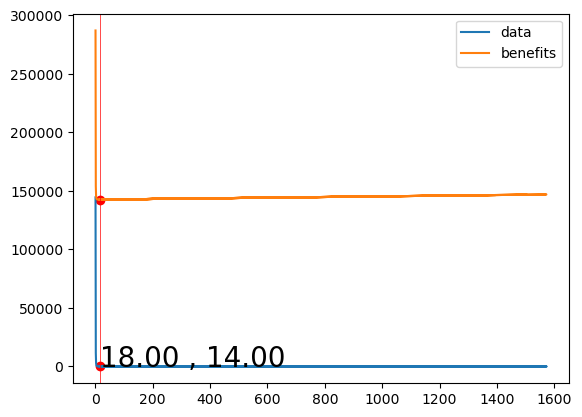

In [18]:
elbow_data = wdf_size["Count"].value_counts().rename("UserCount").rename_axis("NumTweets").reset_index()

elbow_data[elbow_data["NumTweets"] <= 10].UserCount.sum()/161654
get_elbow(elbow_data["NumTweets"], elbow_data["UserCount"], in_plot=True, in_image_path="./elbow.png")

In [19]:
wdf = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("../../datar/randRLRT/userdata/*.csv*")])
wdf.dropna(subset=["Author","Date","Sentiment"], inplace=True)
wdf.drop_duplicates("Url", inplace=True)
# wdf.drop(columns=["Url"], inplace=True)
wdf["Title"] = wdf["Title"].apply(lambda x: x.lower() if type(x) is str else x)
showdf(wdf)
wdf.reset_index(drop=True,inplace=True)
wdf 

                 Date                                                                                                                                                                                                Title                                                                                                                                    Url Sentiment            Author
0 2023-08-21 21:58:00                                                                                                                                                      /co/ - death battle - comics & cartoons - 4chan                                            https://boards.4channel.org/co/thread/138947415#p138973507#f1070eb10143e2b3b5f76d62a0a1ea66   neutral         Anonymous
1 2023-08-21 21:57:01                                                                                                                                                                      even included starbucks clapped                  

,Date,Title,Url,Sentiment,Author
0,2023-08-21 21:58:00,/co/ - death battle - comics & cartoons - 4chan,https://boards.4channel.org/co/thread/13894741...,neutral,Anonymous
1,2023-08-21 21:57:01,even included starbucks clapped,https://www.reddit.com/r/thatHappened/comments...,neutral,AutoModerator
2,2023-08-21 21:55:09,"from @nikestore, the white/wolf grey nike air ...",http://twitter.com/KicksDeals/statuses/1693743...,neutral,KicksDeals
3,2023-08-21 21:55:00,starbucks coffee cups scam?!!,https://www.godlikeproductions.com/forum1/mess...,negative,Anonymous Coward
4,2023-08-21 21:54:41,wrapped hbar hits one day trading volume of $4...,https://www.themarketsdaily.com/2023/08/21/wra...,neutral,Sarita Garza
...,...,...,...,...,...
498501,2023-10-01 14:42:25,ad: dropped via shiekh\ngs nike dunk low 'i am...,http://twitter.com/snkr_twitr/statuses/1708492...,neutral,snkr_twitr
498502,2023-10-01 14:42:00,"/int/ - spainanons, does spain have an extrove...",https://boards.4channel.org/int/thread/1880939...,neutral,Anonymous
498503,2023-10-01 14:41:45,burger king canada's menu adds an american cla...,https://www.henryherald.com/arena/thestreet/bu...,neutral,Daniel Kline
498504,2023-10-01 14:41:00,/fit/ - fph anti-architect edition - fitness -...,https://boards.4channel.org/fit/thread/7241522...,negative,Anonymous


In [20]:
wdf["Author"].nunique()

590

In [21]:
wdf[wdf["Title"].isna()]

,Date,Title,Url,Sentiment,Author
600,2023-08-21 17:09:27,NaN,http://sneakerscartel.tumblr.com/post/72628621...,neutral,sneakerscartel
675,2023-08-21 16:46:52,NaN,http://sneakerscartel.tumblr.com/post/72628702...,neutral,sneakerscartel
1912,2023-08-21 04:08:15,NaN,http://verturesort.tumblr.com/post/72623419040...,neutral,verturesort
2384,2023-08-20 21:12:09,NaN,http://sneakerscartel.tumblr.com/post/72621146...,neutral,sneakerscartel
3223,2023-08-20 13:10:34,NaN,http://verturesort.tumblr.com/post/72617771357...,neutral,verturesort
...,...,...,...,...,...
496851,2023-10-02 10:10:25,NaN,http://verturesort.tumblr.com/post/73006204875...,neutral,verturesort
497055,2023-10-02 07:15:30,NaN,http://verturesort.tumblr.com/post/73005104428...,neutral,verturesort
497232,2023-10-02 04:02:41,NaN,http://verturesort.tumblr.com/post/73003891303...,neutral,verturesort
497254,2023-10-02 03:40:53,NaN,http://sneakerscartel.tumblr.com/post/73006882...,neutral,sneakerscartel


In [22]:
wdf.drop(wdf[wdf["Title"].isna()].index, inplace=True)

In [23]:
start_date_w = datetime.datetime(2023, 5,15)
end_date_w=datetime.datetime(2023, 9, 23)
wdf[(wdf["Date"]>=start_date_w) & (wdf["Date"]<=end_date_w)]["Author"].nunique()

567

In [24]:
wdf.drop( wdf[~( (wdf["Date"]>=start_date_w) & (wdf["Date"]<=end_date_w) )].index, inplace=True)

In [25]:
otxt.write("Unique Authors:", wdf["Author"].nunique())

Unique Authors:	567


In [26]:
otxt.write("Min:", wdf["Date"].min())
otxt.write("Max:", wdf["Date"].max())
otxt.write("Time Range:", wdf["Date"].max() - wdf["Date"].min())

Min:	2023-05-15 04:00:00
Max:	2023-09-23 00:00:00
Time Range:	130 days 20:00:00


In [27]:
wdf["mcdonalds"] = wdf["Title"].apply(lambda x: "mcdonald" in x)
wdf["starbucks"] = wdf["Title"].apply(lambda x: "starbuck" in x)
wdf["nike"] = wdf["Title"].apply(lambda x: "nike" in x)
showdf(wdf)
wdf

                 Date                                                                                                                                                                                                Title                                                                                                                                    Url Sentiment            Author  mcdonalds  starbucks   nike
0 2023-08-21 21:58:00                                                                                                                                                      /co/ - death battle - comics & cartoons - 4chan                                            https://boards.4channel.org/co/thread/138947415#p138973507#f1070eb10143e2b3b5f76d62a0a1ea66   neutral         Anonymous      False      False  False
1 2023-08-21 21:57:01                                                                                                                                                             

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike
0,2023-08-21 21:58:00,/co/ - death battle - comics & cartoons - 4chan,https://boards.4channel.org/co/thread/13894741...,neutral,Anonymous,False,False,False
1,2023-08-21 21:57:01,even included starbucks clapped,https://www.reddit.com/r/thatHappened/comments...,neutral,AutoModerator,False,True,False
2,2023-08-21 21:55:09,"from @nikestore, the white/wolf grey nike air ...",http://twitter.com/KicksDeals/statuses/1693743...,neutral,KicksDeals,False,False,True
3,2023-08-21 21:55:00,starbucks coffee cups scam?!!,https://www.godlikeproductions.com/forum1/mess...,negative,Anonymous Coward,False,True,False
4,2023-08-21 21:54:41,wrapped hbar hits one day trading volume of $4...,https://www.themarketsdaily.com/2023/08/21/wra...,neutral,Sarita Garza,False,False,False
...,...,...,...,...,...,...,...,...
398513,2023-08-21 22:08:00,/int/ - >thai people eat american cheese on a ...,https://boards.4channel.org/int/thread/1863690...,negative,Anonymous,False,False,False
398514,2023-08-21 22:05:01,"icymi: nike dunk low ""washed denim""\n\nbuy her...",http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts,False,False,True
398515,2023-08-21 22:02:42,"cable one, inc. (nyse:cabo) declares dividend ...",https://www.themarketsdaily.com/2023/08/21/cab...,neutral,Michael Walen,False,False,False
398516,2023-08-21 22:02:21,rt @sneakercheaper nike streetgato\nsoccer sho...,http://twitter.com/ScottyDeals/statuses/169374...,neutral,ScottyDeals,False,False,True


In [28]:
wdf["Author"].nunique()

567

In [29]:
wdf.drop(wdf[~wdf["mcdonalds"] & ~wdf["starbucks"] & ~wdf["nike"]].index, inplace=True)
showdf(wdf)
wdf

                  Date                                                                                                                                                                                                Title                                                                                                                                    Url Sentiment            Author  mcdonalds  starbucks   nike
1  2023-08-21 21:57:01                                                                                                                                                                      even included starbucks clapped                                        https://www.reddit.com/r/thatHappened/comments/15xlihd/even_included_starbucks_clapped/jx6wv0r/   neutral     AutoModerator      False       True  False
2  2023-08-21 21:55:09  from @nikestore, the white/wolf grey nike air max 97 is available for $140 + free shipping.\n\nbuy here -> https://t.co/ur9npbaz0t (promotion - use code

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike
1,2023-08-21 21:57:01,even included starbucks clapped,https://www.reddit.com/r/thatHappened/comments...,neutral,AutoModerator,False,True,False
2,2023-08-21 21:55:09,"from @nikestore, the white/wolf grey nike air ...",http://twitter.com/KicksDeals/statuses/1693743...,neutral,KicksDeals,False,False,True
3,2023-08-21 21:55:00,starbucks coffee cups scam?!!,https://www.godlikeproductions.com/forum1/mess...,negative,Anonymous Coward,False,True,False
8,2023-08-21 21:52:56,rt @more_2_conquer monday vibes‼️ nike air max...,http://twitter.com/Kayas_Kicks/statuses/169374...,neutral,Kayas_Kicks,False,False,True
13,2023-08-21 21:51:10,nike dunk low 'houston comets four peat' ☄️\n\...,http://twitter.com/JustFreshKicks/statuses/169...,neutral,JustFreshKicks,False,False,True
...,...,...,...,...,...,...,...,...
398511,2023-08-21 22:10:10,#sneakerscouts the nike dunk high premium 'cra...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True
398512,2023-08-21 22:10:00,"nike dunk low remastered ""white black"" \n\nbuy...",http://twitter.com/TheSneakerFirm1/statuses/16...,neutral,TheSneakerFirm1,False,False,True
398514,2023-08-21 22:05:01,"icymi: nike dunk low ""washed denim""\n\nbuy her...",http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts,False,False,True
398516,2023-08-21 22:02:21,rt @sneakercheaper nike streetgato\nsoccer sho...,http://twitter.com/ScottyDeals/statuses/169374...,neutral,ScottyDeals,False,False,True


In [30]:
wdf["Author"].nunique()

537

In [31]:
author_mcd = wdf[["Author", "mcdonalds"]].groupby("Author").apply(lambda gwdf: gwdf["mcdonalds"].sum()).rename("mcdonalds_count").reset_index()
author_stb = wdf[["Author", "starbucks"]].groupby("Author").apply(lambda gwdf: gwdf["starbucks"].sum()).rename("starbucks_count").reset_index()
author_nke = wdf[["Author", "nike"]].groupby("Author").apply(lambda gwdf: gwdf["nike"].sum()).rename("nike_count").reset_index()

In [32]:
author_brand = author_mcd.merge(author_stb, how="outer", on="Author", validate="one_to_one").merge(author_nke, how="outer", on="Author", validate="one_to_one").set_index("Author")
author_brand["counts_sum"] = author_brand.sum(axis=1)
author_brand["max_type"] = author_brand[["mcdonalds_count","starbucks_count","nike_count"]].idxmax(axis=1).apply(lambda x: x[:-6])
# author_brand["mcdonalds_count"] /= author_brand["counts_sum"]
# author_brand["starbucks_count"] /= author_brand["counts_sum"]
# author_brand["nike_count"] /= author_brand["counts_sum"]

author_brand = author_brand[author_brand["counts_sum"] > 18]
showdf(author_brand)
author_brand

                 mcdonalds_count  starbucks_count  nike_count  counts_sum   max_type
Author                                                                              
3TheHardWayKixs                0                0        1054        1054       nike
412Tickets                     0              109           0         109  starbucks
4Mischief                      8                9           8          25  starbucks
ABC7                          27               20          16          63  mcdonalds
Aap Newswire                  67                0           0          67  mcdonalds
Shape:	(253, 5)


,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
3TheHardWayKixs,0,0,1054,1054,nike
412Tickets,0,109,0,109,starbucks
4Mischief,8,9,8,25,starbucks
ABC7,27,20,16,63,mcdonalds
Aap Newswire,67,0,0,67,mcdonalds
...,...,...,...,...,...
xXcvchikXx,0,2,640,642,nike
yourfreshbread,0,0,370,370,nike
zSneakerHeadz,0,0,72,72,nike


In [33]:
_ = author_brand[(author_brand["nike_count"] != 0) & (author_brand["starbucks_count"] == author_brand["nike_count"])]
showdf(_, False, "Equal starbucks and nike:")
_

Equal starbucks and nike:
               mcdonalds_count  starbucks_count  nike_count  counts_sum   max_type
Author                                                                            
Michael Walen               53               48          48         149  mcdonalds
Scott Davis                 95               54          54         203  mcdonalds
Shape:	(2, 5)


,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
Michael Walen,53,48,48,149,mcdonalds
Scott Davis,95,54,54,203,mcdonalds


In [34]:
_ = author_brand[(author_brand["mcdonalds_count"] != 0) & (author_brand["nike_count"] == author_brand["mcdonalds_count"])]
showdf(_, False, "Equal nike and mcdonalds:")
_

Equal nike and mcdonalds:
                  mcdonalds_count  starbucks_count  nike_count  counts_sum   max_type
Author                                                                               
4Mischief                       8                9           8          25  starbucks
Emily Schoerning               32               28          32          92  mcdonalds
SkyNews                        11                1          11          23  mcdonalds
TrungTPhan                      9               14           9          32  starbucks
admin                          79               75          79         233  mcdonalds
greenhousenyt                   1               49           1          51  starbucks
worldranking_                   8               17           8          33  starbucks
Shape:	(7, 5)


,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
4Mischief,8,9,8,25,starbucks
Emily Schoerning,32,28,32,92,mcdonalds
SkyNews,11,1,11,23,mcdonalds
TrungTPhan,9,14,9,32,starbucks
admin,79,75,79,233,mcdonalds
greenhousenyt,1,49,1,51,starbucks
worldranking_,8,17,8,33,starbucks


In [35]:
_ = author_brand[(author_brand["mcdonalds_count"] != 0) & (author_brand["starbucks_count"] == author_brand["mcdonalds_count"])]
showdf(_, False, "Equal starbucks and mcdonalds:")
_

Equal starbucks and mcdonalds:
                 mcdonalds_count  starbucks_count  nike_count  counts_sum   max_type
Author                                                                              
AllDayBuckets23                1                1        1840        1842       nike
NBCNews                        9                9           1          19  mcdonalds
TheReal_JMillz_                2                2        1138        1142       nike
bagsfan75_Tony               320              320           4         644  mcdonalds
beiberlove69                   1                1         978         980       nike
nachodelaheysus                1                1        2743        2745       nike
wilcocarla                     1                1         974         976       nike
Shape:	(7, 5)


,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
AllDayBuckets23,1,1,1840,1842,nike
NBCNews,9,9,1,19,mcdonalds
TheReal_JMillz_,2,2,1138,1142,nike
bagsfan75_Tony,320,320,4,644,mcdonalds
beiberlove69,1,1,978,980,nike
nachodelaheysus,1,1,2743,2745,nike
wilcocarla,1,1,974,976,nike


In [36]:
_ = wdf[~wdf["mcdonalds"] & ~wdf["starbucks"] & ~wdf["nike"]]
showdf(_, False, "Rows with False for all three mcdonalds, starbucks, and nike:")
_

Rows with False for all three mcdonalds, starbucks, and nike:
Empty DataFrame
Columns: [Date, Title, Url, Sentiment, Author, mcdonalds, starbucks, nike]
Index: []
Shape:	(0, 8)


,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike


In [37]:
author_to_brand = author_brand['max_type'].to_dict()

In [38]:
len(author_to_brand)

253

In [39]:
wdf["Author"].nunique()

537

In [40]:
# drop tweets by all other users
wdf.drop(wdf[~wdf["Author"].isin(author_to_brand)].index, inplace=True)

In [41]:
wdf["AuthorBrand"] = wdf["Author"].apply(lambda x: author_to_brand[x])
showdf(wdf, msg="Non brand authors removed:")
wdf

Non brand authors removed:
                  Date                                                                                                                                                                                                Title                                                                                                                                    Url Sentiment            Author  mcdonalds  starbucks   nike AuthorBrand
1  2023-08-21 21:57:01                                                                                                                                                                      even included starbucks clapped                                        https://www.reddit.com/r/thatHappened/comments/15xlihd/even_included_starbucks_clapped/jx6wv0r/   neutral     AutoModerator      False       True  False        nike
2  2023-08-21 21:55:09  from @nikestore, the white/wolf grey nike air max 97 is available for $140 + free shipping.\n\nbuy he

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike,AuthorBrand
1,2023-08-21 21:57:01,even included starbucks clapped,https://www.reddit.com/r/thatHappened/comments...,neutral,AutoModerator,False,True,False,nike
2,2023-08-21 21:55:09,"from @nikestore, the white/wolf grey nike air ...",http://twitter.com/KicksDeals/statuses/1693743...,neutral,KicksDeals,False,False,True,nike
3,2023-08-21 21:55:00,starbucks coffee cups scam?!!,https://www.godlikeproductions.com/forum1/mess...,negative,Anonymous Coward,False,True,False,mcdonalds
8,2023-08-21 21:52:56,rt @more_2_conquer monday vibes‼️ nike air max...,http://twitter.com/Kayas_Kicks/statuses/169374...,neutral,Kayas_Kicks,False,False,True,nike
13,2023-08-21 21:51:10,nike dunk low 'houston comets four peat' ☄️\n\...,http://twitter.com/JustFreshKicks/statuses/169...,neutral,JustFreshKicks,False,False,True,nike
...,...,...,...,...,...,...,...,...,...
398511,2023-08-21 22:10:10,#sneakerscouts the nike dunk high premium 'cra...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True,nike
398512,2023-08-21 22:10:00,"nike dunk low remastered ""white black"" \n\nbuy...",http://twitter.com/TheSneakerFirm1/statuses/16...,neutral,TheSneakerFirm1,False,False,True,nike
398514,2023-08-21 22:05:01,"icymi: nike dunk low ""washed denim""\n\nbuy her...",http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts,False,False,True,nike
398516,2023-08-21 22:02:21,rt @sneakercheaper nike streetgato\nsoccer sho...,http://twitter.com/ScottyDeals/statuses/169374...,neutral,ScottyDeals,False,False,True,nike


In [42]:
# remove tweets in which Authors talk about other brands than the one they mostly talk about
wdf.drop(wdf[wdf[['mcdonalds', 'starbucks','nike', 'AuthorBrand']].apply(lambda row: not row[row["AuthorBrand"]], axis=1)].index, inplace=True)

In [43]:
sentiment_to_number = {"none": 1, "positive": 2, "neutral": 3, "negative": 4}
wdf["SentimentNo"] = wdf["Sentiment"].apply(lambda x: sentiment_to_number[x])
showdf(wdf, msg="SentimentNo added:")
wdf

SentimentNo added:
                  Date                                                                                                                                                                                                Title                                                             Url Sentiment          Author  mcdonalds  starbucks  nike AuthorBrand  SentimentNo
2  2023-08-21 21:55:09  from @nikestore, the white/wolf grey nike air max 97 is available for $140 + free shipping.\n\nbuy here -> https://t.co/ur9npbaz0t (promotion - use code ready at checkout) https://t.co/e52supbp3r      http://twitter.com/KicksDeals/statuses/1693743568886657029   neutral      KicksDeals      False      False  True        nike            3
8  2023-08-21 21:52:56                       rt @more_2_conquer monday vibes‼️ nike air max 97 gold\nbullet💪🏽✊🏽🫡🔥🚀✨✨✨#kotd #wearyoursneakers #nike #oglove #snkrsliveheatingup #atmoscollectorsclub https://t.co/2xfafgm5j1     http://twitter.com/Kayas_Kicks/

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike,AuthorBrand,SentimentNo
2,2023-08-21 21:55:09,"from @nikestore, the white/wolf grey nike air ...",http://twitter.com/KicksDeals/statuses/1693743...,neutral,KicksDeals,False,False,True,nike,3
8,2023-08-21 21:52:56,rt @more_2_conquer monday vibes‼️ nike air max...,http://twitter.com/Kayas_Kicks/statuses/169374...,neutral,Kayas_Kicks,False,False,True,nike,3
13,2023-08-21 21:51:10,nike dunk low 'houston comets four peat' ☄️\n\...,http://twitter.com/JustFreshKicks/statuses/169...,neutral,JustFreshKicks,False,False,True,nike,3
15,2023-08-21 21:48:02,@rchrd_305 @nike @nikesb @nikestore @jumpman23...,http://twitter.com/Dan_in_SD/statuses/16937417...,neutral,Dan_in_SD,False,False,True,nike,3
16,2023-08-21 21:48:00,rt @snkr_twitr ad: nike dunk low 'oil green'\n...,http://twitter.com/ee_vans01/statuses/16937417...,neutral,ee_vans01,False,False,True,nike,3
...,...,...,...,...,...,...,...,...,...,...
398511,2023-08-21 22:10:10,#sneakerscouts the nike dunk high premium 'cra...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True,nike,3
398512,2023-08-21 22:10:00,"nike dunk low remastered ""white black"" \n\nbuy...",http://twitter.com/TheSneakerFirm1/statuses/16...,neutral,TheSneakerFirm1,False,False,True,nike,3
398514,2023-08-21 22:05:01,"icymi: nike dunk low ""washed denim""\n\nbuy her...",http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts,False,False,True,nike,3
398516,2023-08-21 22:02:21,rt @sneakercheaper nike streetgato\nsoccer sho...,http://twitter.com/ScottyDeals/statuses/169374...,neutral,ScottyDeals,False,False,True,nike,3


In [44]:
def get_avg_sentiment(df):
    # print(df.head(), df["SentimentNo"].mode().sort_values().iloc[0])
    return df["SentimentNo"].mode().sort_values().iloc[0]
    
pvt = wdf[["Date", "Author", "SentimentNo"]].set_index("Date").groupby([pd.Grouper(freq=FREQUENCY), 'Author']).apply(lambda tdf: get_avg_sentiment(tdf)).rename("ModeSentiment").reset_index()
showdf(pvt)
pvt

        Date           Author  ModeSentiment
0 2023-05-15  3TheHardWayKixs              3
1 2023-05-15       412Tickets              2
2 2023-05-15     AbhipraGroup              3
3 2023-05-15  AllDayBuckets23              3
4 2023-05-15      Andrew Walz              3
Shape:	(16122, 3)


,Date,Author,ModeSentiment
0,2023-05-15,3TheHardWayKixs,3
1,2023-05-15,412Tickets,2
2,2023-05-15,AbhipraGroup,3
3,2023-05-15,AllDayBuckets23,3
4,2023-05-15,Andrew Walz,3
...,...,...,...
16117,2023-09-22,vsrsus,3
16118,2023-09-22,wilcocarla,2
16119,2023-09-22,xXcvchikXx,2
16120,2023-09-22,zachdaswfan,3


In [45]:
output_wdf = pvt.pivot(index="Author", columns="Date", values="ModeSentiment").fillna(1)
output_wdf.to_csv("W_data_f{}_mt{}.csv".format(FREQUENCY, MIN_TWEETS))
showdf(output_wdf)
output_wdf

Date             2023-05-15  2023-05-16  2023-05-17  2023-05-18  2023-05-19  2023-05-20  2023-05-21  2023-05-22  2023-05-23  2023-05-24  2023-05-25  2023-05-26  2023-05-27  2023-05-28  2023-05-29  2023-05-30  2023-05-31  2023-06-01  2023-06-02  2023-06-03  2023-06-04  2023-06-05  2023-06-06  2023-06-07  2023-06-08  2023-06-09  2023-06-10  2023-06-11  2023-06-12  2023-06-13  2023-06-14  2023-06-15  2023-06-16  2023-06-17  2023-06-18  2023-06-19  2023-06-20  2023-06-21  2023-06-22  2023-06-23  2023-06-24  2023-06-25  2023-06-26  2023-06-27  2023-06-28  2023-06-29  2023-06-30  2023-07-01  2023-07-02  2023-07-03  2023-07-04  2023-07-05  2023-07-06  2023-07-07  2023-07-08  2023-07-09  2023-07-10  2023-07-11  2023-07-12  2023-07-13  2023-07-14  2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  2023-07-20  2023-07-21  2023-07-22  2023-07-23  2023-07-24  2023-07-25  2023-07-26  2023-07-27  2023-07-28  2023-07-29  2023-07-30  2023-07-31  2023-08-01  2023-08-02  2023-08-03  2023-08-04 

Date,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,2023-05-20,2023-05-21,2023-05-22,2023-05-23,2023-05-24,...,2023-09-14,2023-09-15,2023-09-16,2023-09-17,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-23
Author,,,,,,,,,,,,,,,,,,,,,
3TheHardWayKixs,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
412Tickets,2.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,...,2.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0
4Mischief,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ABC7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0
Aap Newswire,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xXcvchikXx,2.0,2.0,2.0,2.0,2.0,1.0,1.0,4.0,2.0,3.0,...,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,2.0,1.0
yourfreshbread,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zSneakerHeadz,1.0,1.0,1.0,3.0,2.0,1.0,1.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0


In [46]:
pvt["ModeSentiment"].value_counts()/pvt.shape[0]

3    0.868193
2    0.104764
4    0.027044
Name: ModeSentiment, dtype: float64

In [47]:
output_wdf.apply(pd.Series.value_counts).sum(axis=1) / 11342

1.0    1.523012
2.0    0.148916
3.0    1.234086
4.0    0.038441
dtype: float64

## Y

In [48]:
before_event_datetime = datetime.datetime(2023, 10, 8, 4)
print(before_event_datetime)
before_start = before_event_datetime - datetime.timedelta(days=14)
print(before_start)
after_end = before_event_datetime + datetime.timedelta(days=14)
print(after_end)

2023-10-08 04:00:00
2023-09-24 04:00:00
2023-10-22 04:00:00


In [49]:
ydf = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("../../datar/randRLRT/*.csv*")]).sort_values("Date")
ydf.dropna(subset=["Author","Date","Sentiment"], inplace=True)
ydf.drop_duplicates("Url", inplace=True)
# ydf.drop(columns=["Url"], inplace=True)
ydf["Title"] = ydf["Title"].apply(lambda x: x.lower() if type(x) is str else x)
#ydf.reset_index(drop=True, inplace=True)
ydf 

,Date,Title,Url,Sentiment,Author
10368,2023-05-01 04:00:00,campus dining breakdown,https://utdmercury.com/campus-dining-breakdown/,neutral,"Shriya Vyasam, Rainier Pederson"
10366,2023-05-01 04:00:05,50% off the nike repeat tape logo cargo pants ...,http://twitter.com/MenswearDeals/statuses/1652...,neutral,MenswearDeals
10365,2023-05-01 04:00:05,NaN,http://gaia-is-here-now.tumblr.com/post/716086...,neutral,gaia-is-here-now
10364,2023-05-01 04:00:06,@duper_aspergers i heard mcdonald's is hiring ...,http://twitter.com/Ryazia12/statuses/165288558...,negative,Ryazia12
10363,2023-05-01 04:00:17,rt @7veritas4 psa: stop freaking out over trum...,http://twitter.com/bozobaxter/statuses/1652885...,negative,bozobaxter
...,...,...,...,...,...
4,2023-05-15 03:58:25,NaN,http://violets-in-spring.tumblr.com/post/71735...,neutral,violets-in-spring
3,2023-05-15 03:58:27,i want that nigga dtap working in a nike sweat...,http://twitter.com/fymjayy_/statuses/165795859...,negative,fymjayy_
2,2023-05-15 03:58:36,rt @sammyveli nike and grizzlies: nigga we’re ...,http://twitter.com/CliffYoungIII/statuses/1657...,neutral,CliffYoungIII
1,2023-05-15 03:58:46,all honesty… i think nike dropping ja might be...,http://twitter.com/bigterry901/statuses/165795...,negative,bigterry901


In [50]:
ydf["Author"].nunique()

236884

In [51]:
len(author_to_brand), wdf["Author"].nunique()

(253, 253)

In [52]:
# drop entries with empty Title
ydf.drop(ydf[ydf["Title"].isna()].index, inplace=True)

In [53]:
# use the same users as W
ydf.drop(ydf[~ydf["Author"].isin(author_to_brand)].index, inplace=True)
ydf.shape

(321, 5)

In [54]:
bef_ydf = ydf[(before_start <= ydf["Date"]) & (ydf["Date"] > before_event_datetime)]
bef_ydf

,Date,Title,Url,Sentiment,Author


In [55]:
aft_ydf = ydf[(before_event_datetime <= ydf["Date"]) & (ydf["Date"] < after_end)]
aft_ydf

,Date,Title,Url,Sentiment,Author


In [56]:
author_before = bef_ydf[["Author", "Sentiment"]].groupby("Author").value_counts().rename("SentimentCount").reset_index().pivot(index="Author", columns="Sentiment", values="SentimentCount").fillna(0)
author_before

Sentiment
Author


In [57]:
author_after = aft_ydf[["Author", "Sentiment"]].groupby("Author").value_counts().rename("SentimentCount").reset_index().pivot(index="Author", columns="Sentiment", values="SentimentCount").fillna(0)
author_after

Sentiment
Author


In [58]:
author_before_after = author_before.join(author_after, how="outer", lsuffix="_before", rsuffix="_after")
author_before_after

Sentiment
Author


In [59]:
author_before_after["diff_before"] = author_before_after["positive_before"] - author_before_after["negative_before"]
author_before_after["diff_after"] = author_before_after["positive_after"] - author_before_after["negative_after"]
author_before_after

KeyError: 'positive_before'

In [ ]:
author_before_after["Y"] = author_before_after[["diff_before", "diff_after"]].apply(lambda row: 1 if abs(row["diff_after"] - row["diff_before"]) > 1 else 0, axis=1)
author_before_after

In [ ]:
author_before_after["Y"].value_counts()

In [ ]:
author_before_after["Y"].value_counts() / author_before_after.shape[0]

In [ ]:
author_before_after.to_csv("Y_data.csv")

In [ ]:
(author_before_after["diff_after"] - author_before_after["diff_before"]).value_counts().sort_index()

In [ ]:
author_before_after["Y"].value_counts()

In [ ]:
author_before_after["Y"].value_counts() / author_before_after.shape[0]

In [ ]:
# ydf[ydf["Author"] == "yenimeilani76"].iloc[-2].to_dict()

In [ ]:
# Drop all tweets by users: "FENRIR___13", "yenimeilani76"
# ydf.drop(ydf[ydf["Author"].isin({"FENRIR___13", "yenimeilani76"})].index, inplace=True)

In [ ]:
author_before_after["author_brand"] = author_before_after[["Y"]].apply(lambda x: author_to_brand[x.name], axis=1)
author_before_after

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
author_brand.max_type.value_counts()

In [ ]:
author_brand.max_type.value_counts() / author_brand.shape[0]

In [ ]:
author_brand.shape

In [ ]:
author_brand.max_type.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':20})
plt.ylabel(None)
plt.show()